# Analysis of Student Alcohol Consumption

### by Zeynep Yilmazcoban and Anna Grover

##### Education is a key factor for achieving a better society. Throughout this tutorial we will be analyzing the correlation between student alcohol consumption and school success. The dataset we will be using contains data of secondary school students in Portugal. The dataset also contains information on students such as their sex, age, grades, number of school failures, relationships, and more. There is also data on their families such as family size, mother's and father's job, mother's and father's education level, if there is family educational support, and quality of the relationship between student in family. By the end, we aim to look at certain characteristics and how that relates to alcohol consumption.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

The first step of the data science cycle is data collection. Here, we do this by using pandas' read_csv function to read our student-mat.cvs file. For each student, the dataset provides information printed below. Using these different types of information, we can analyze how alcohol consumption affects students. 

In [2]:
data = pd.read_csv("student-mat.csv")
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Here is a list of some of the columns and their definitions as some column values might be unclear as to what they mean. For example, the health column contains a range of values where 1 shows that the student has very bad health and 5 shows great health. 

Column Definitions:
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- studytime - weekly study time (numeric: 1 - 10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
- G3 - final grades (from 0 to 20)

## Data Management/Representation

The goal of this stage of the data science cylce is to essentially clean up the dataset. We need to check for null or NaN values and get rid of them if necessary. Then we will check if there are any invalid or messy values in each column and update if necessary. Thankfully, the dataset we are using is already very clean and organized, so we will not need to do too much cleaning. However, we will  be reformatting our dataset in this stage to make it easier to use for our study and remove unnecessary information that we won't be utilizing to prevent confusion. 



Using the isnull function, we can see here that there are no null or NaN values in the data frame, so we don't need to worry about that.

In [3]:
data.isnull().sum().sum()

0

Now, we will reformat our data frame. We first decided to add a new column that shows average alcohol consumption level in one week since the dataset has them seperately as workday alcohol consumption and weekend alcohol consumption. We do this by taking the workkday alcohol consumption level and multiply it by 5 (for 5 workdays in a week) and add that to the weekend alcohol consumption level times 2 (for 2 weekend days in a week). Then, we divide by 7 (total number of days in a week) to get the average. Our result is a new column that is still on a scale of 1 to 5. As shown in the beginning, alcohol consumption values are in a range of 1 to 5 where 1 is very low amount and 5 is very high amount. 
We will also rename some columns that has confusing names do that our data frame is easier to read for future use. We then drop several columns that we will not be using in our analysis.


In [4]:
# adding a new column of total weekly alcohol consumption
data['TotalAlc'] = np.round(((data['Dalc']*5) + (data['Walc']*2))/7)

# renaming columns
data.rename(columns = {'Pstatus':'parents cohabitation', 'famrel':'family relationship', 'Dalc' : 'workday alcohol',
                      'Walc' : 'weekend alcohol', 'G3' : 'final grade'}, inplace = True)

# dropping unrelated columns
data.drop(['address', 'G1', 'G2', 'reason', 'guardian', 'nursery', 'internet', 'paid', 'traveltime'], axis=1, inplace=True)
data

,school,sex,age,famsize,parents cohabitation,Medu,Fedu,Mjob,Fjob,studytime,...,romantic,family relationship,freetime,goout,workday alcohol,weekend alcohol,health,absences,final grade,TotalAlc
0,GP,F,18,GT3,A,4,4,at_home,teacher,2,...,no,4,3,4,1,1,3,6,6,1.0
1,GP,F,17,GT3,T,1,1,at_home,other,2,...,no,5,3,3,1,1,3,4,6,1.0
2,GP,F,15,LE3,T,1,1,at_home,other,2,...,no,4,3,2,2,3,3,10,10,2.0
3,GP,F,15,GT3,T,4,2,health,services,3,...,yes,3,2,2,1,1,5,2,15,1.0
4,GP,F,16,GT3,T,3,3,other,other,2,...,no,4,3,2,1,2,5,4,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,LE3,A,2,2,services,services,2,...,no,5,5,4,4,5,4,11,9,4.0
391,MS,M,17,LE3,T,3,1,services,services,1,...,no,2,4,5,3,4,2,3,16,3.0
392,MS,M,21,GT3,T,1,1,other,other,1,...,no,5,5,3,3,3,3,3,7,3.0
393,MS,M,18,LE3,T,3,2,services,other,1,...,no,4,4,1,3,4,5,0,10,3.0


## Exploratory Data Analysis

In the explatory data analysis stage, we will utilize our data to see relations and potential trends between values. In this stage, we will mainly plot our data to create various charts and graphs to be able to do analysis.



Here, we are using the describe function which will display a statistics summary of the numerical columns in our data frame.

In [5]:
data.describe()

,age,Medu,Fedu,studytime,failures,family relationship,freetime,goout,workday alcohol,weekend alcohol,health,absences,final grade,TotalAlc
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190,1.716456
std,1.276043,1.094735,1.088201,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443,0.966761
min,15.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,16.000000,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,1.000000
50%,17.000000,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,2.000000
max,22.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000,5.000000


This table provides us with important information. The average age of students in the study is approximately 17 and we see that there are not that many failures (less than 1 for the average). In general, it seems like students have pretty good relationships with their families and have good health (both values are above a 3). Average alcohol consumption doesn't seem too high with an average workday consumption being ~1.5 and weekend being ~2.3. Most of the data must have alcohol consumptions less than 3. However there is at least 1 student with maximum amount of consumption, meaning that high alcohol consumption does exist somewhere in the dataset. Final grade (in their Math course) average is a 10/20, which is low. 

#### School Demographics

In [6]:
data['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

From the values above, we can see that the majority of the students are between 16-19. There is only one person who is 21 and is legal for drinking in the US. However, it is important to keep in mind that the drinking age in Portugal is 18 and the law provides an exception for minors aged 16 and 17, if they consume a glass of beer, wine or cider with a meal in a restaurant.



Below, we will be creating plot that shows the average alcohol consumption per age group. To do that, we are creating a small table that takes the mean of total alcohol consumption per age group, then we plot that table. 

Text(0, 0.5, 'alcohol consumption (1 - low, 10 - high)')

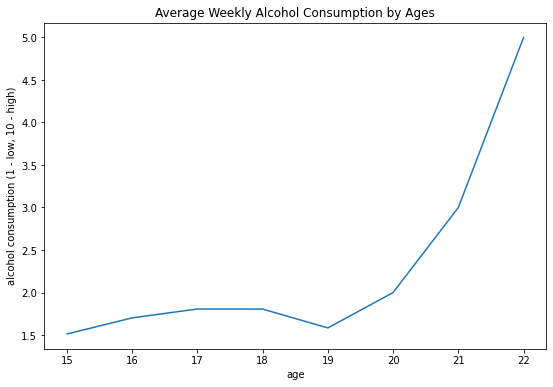

In [7]:
table = data.groupby('age')['TotalAlc'].mean()
plt.figure(figsize=(9, 6))
table.plot()
plt.title("Average Weekly Alcohol Consumption by Ages")
plt.ylabel("alcohol consumption (1 - low, 10 - high)")

From the above plot, we observe that in general, alcohol intake increases as the age goes up. Specifically, ages 21 and 22 have the highest amount. As expected, youngest age (15) has the lowest alcohol consumption. While consumption increases from ages 15 to 17, it slowly decreases from 17 to 19. After age 19, consumption increases very steeply. This makes sense as 18 is the legal drinking age in Portugal, so ages 18+ will have higher alcohol consumption. It is also possible that ages less than 18 won't want to tell the truth about their alcohol consumption, so this could be an issue with the data collection that on our side, we can't control.


Now, we are creating bar charts to show alcohol consumption on workdays vs. weekends. We do this using the seaborn bar charts.

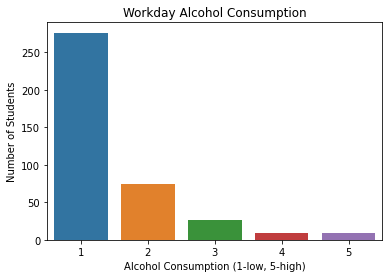

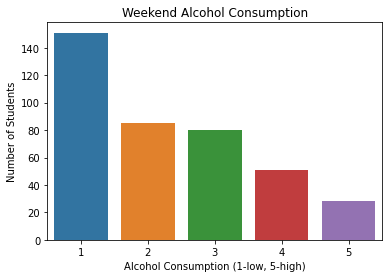

In [8]:
workdayalcohol = data["workday alcohol"].value_counts()
ax = sns.barplot(x = workdayalcohol.index, y = workdayalcohol.values)
plt.ylabel('Number of Students')
plt.xlabel('Alcohol Consumption (1-low, 5-high)')
plt.title('Workday Alcohol Consumption')
plt.show()
weekendalcohol = data["weekend alcohol"].value_counts()
ax = sns.barplot(x = weekendalcohol.index, y = weekendalcohol.values)
plt.ylabel('Number of Students')
plt.xlabel('Alcohol Consumption (1-low, 5-high)')
plt.title('Weekend Alcohol Consumption')
plt.show()

As expected, alcohol consumption is significantly higher during the weekends. We can see that there are more reports of higher levels of alcohol consumptions on the weekend than workdays. For example, a level 4 on a workday is only reported by ~10-20 students, wheras on the weekend, we see almost 60 students reporting a level 4. This is not surprising because the weekend is typically a time to party and have fun.

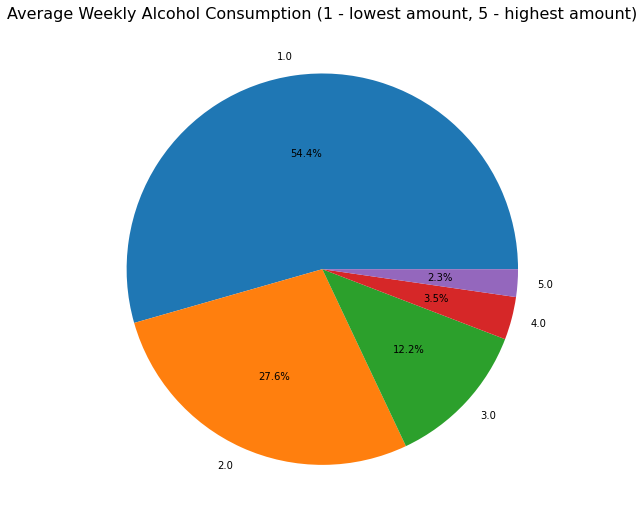

In [9]:
labels = data.TotalAlc.value_counts().index 
values = data.TotalAlc.value_counts().values 
plt.figure(figsize=(9, 9))
plt.pie(values, labels=labels, autopct= "%1.1f%%")
plt.title("Average Weekly Alcohol Consumption (1 - lowest amount, 5 - highest amount)", fontsize = 16)
plt.show()

The pie chart above shows us the percentages of the amount of alcohol consumption by students. It seems like more than half of the students have relatively low alcohol intake. The percentage decreases as the amount of consumption increases. This also shows us that there is less data on students with higher levels of alcohol consumption, which is a possible skew in the dataset. Therefore, our ML may be affected later on.

Below, we are using Seaborn's swarmplot to classify students' grades as above average and below average and see the relation between those grades and alcohol consumption. To make the swarmplot, we will calculate the mean of the final grade column which will determine the differentiating line on the graph. Then we place the points accordingly by comparing each grade to the mean. 

[Text(0.5, 0, 'Average Weekly Alcohol Intake (1-lowest, 5-highest)'),
 Text(0, 0.5, 'Final grades (0-20)')]

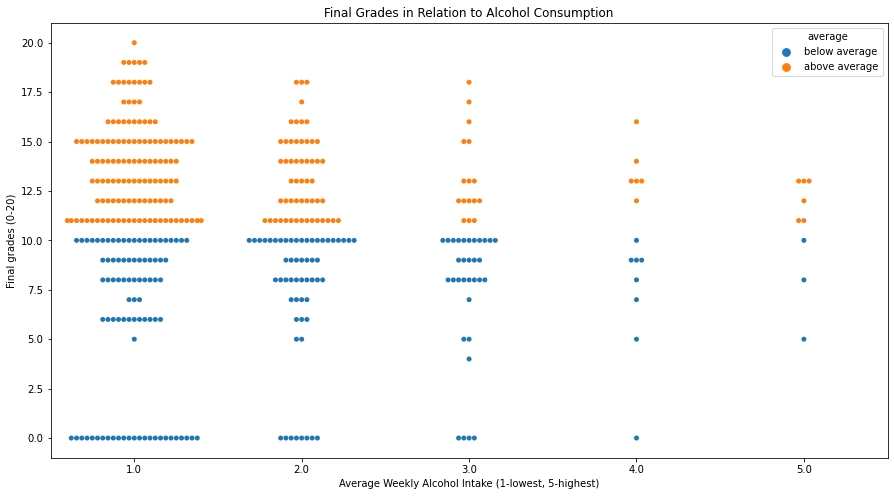

In [10]:
mean = sum(data['final grade']) / float(len(data))
data["average"] = ['above average' if i > mean else 'below average' for i in data['final grade']]
plt.figure(figsize = (15,8))
sp = sns.swarmplot(x = 'TotalAlc', y = 'final grade', hue = 'average', data = data)
sp.set(title = "Final Grades in Relation to Alcohol Consumption")
sp.set(xlabel = "Average Weekly Alcohol Intake (1-lowest, 5-highest)", ylabel = "Final grades (0-20)")

The swarmplot shows that the final grade average is around 11 out of 20. If we consider the ratios, it seems like more students earned above average grades for consumption levels 1 and 2 which are the lowest amounts. In comparison, for groups whose alcohol consumption levels are 3 and 4, more students earned below average grades than above average. We also observe that the student who got the highest grade (20) has an alcohol consumption level of 1. 

In the rest of our explatory data analysis, we will be making bar charts of students who consume more alcohol and less alcohol vs. their final grades, class failures, and health levels. This will help us identify any relationship or trend alcohol consumption has on student success. We are using Seaborn again to make these bar charts. For the group of students who consume more alcohol, we include those who has a total alcohol consumption value of 3 or more. 

[Text(0.5, 0, 'final grade (1-20)'), Text(0, 0.5, 'density')]

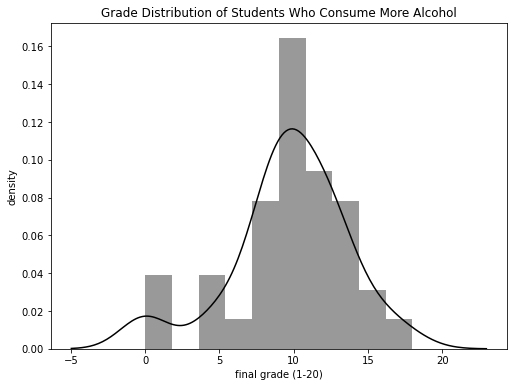

<Figure size 1080x576 with 0 Axes>

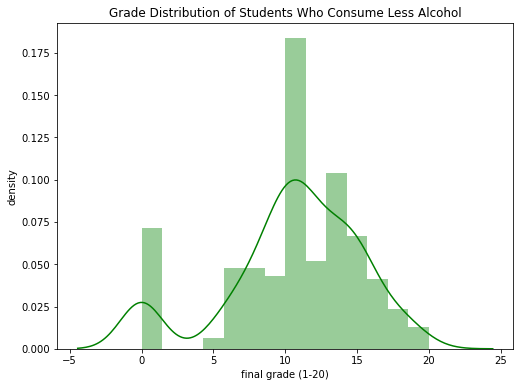

<Figure size 1080x576 with 0 Axes>

In [11]:
ax = plt.figure(figsize=(18,6)).add_subplot(121)
plt.figure(figsize = (15,8))
sns.distplot(data[(data.TotalAlc >= 3)]["final grade"], color = 'black', ax = ax)
ax.set_title('Grade Distribution of Students Who Consume More Alcohol')
ax.set(xlabel = "final grade (1-20)", ylabel = "density")
ax = plt.figure(figsize=(18,6)).add_subplot(122)
plt.figure(figsize = (15,8))
sns.distplot(data[(data.TotalAlc < 3)]['final grade'], color = 'green', ax = ax)
ax.set_title('Grade Distribution of Students Who Consume Less Alcohol')
ax.set(xlabel = "final grade (1-20)", ylabel = "density")

Looking at the tables above, we can say that students who consumed more alcohol received lower grades compared to those who consumed less alcohol. We see this because the density in the higher consumption levels is higher at the 10/20 mark than in the less consumption graph. Also, the curve in the less alcohol graph is a little more spread out in the higher grades, meaning that there is more density in students scoring higher with less alcohol consumption than in the higher consumption levels. 

Text(0.5, 1.0, 'Failures of Students Who Consume Less Alcohol')

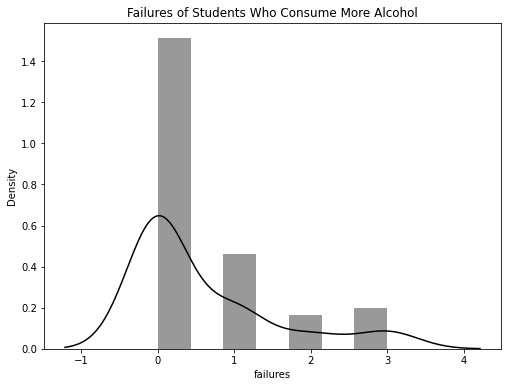

<Figure size 1080x576 with 0 Axes>

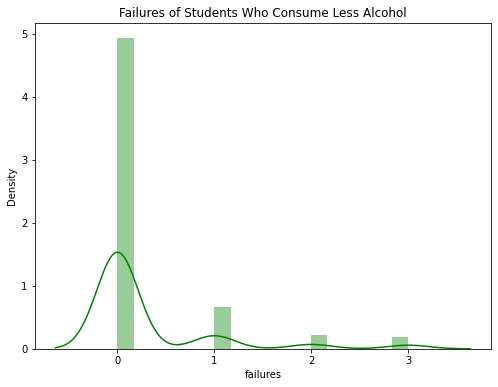

<Figure size 1080x576 with 0 Axes>

In [12]:
ax = plt.figure(figsize=(18,6)).add_subplot(121)
plt.figure(figsize = (15,8))
sns.distplot(data[(data.TotalAlc >= 3)]["failures"], color = 'black', ax = ax)
ax.set_title('Failures of Students Who Consume More Alcohol')
ax = plt.figure(figsize=(18,6)).add_subplot(122)
plt.figure(figsize = (15,8))
sns.distplot(data[(data.TotalAlc < 3)]['failures'], color = 'green', ax = ax)
ax.set_title('Failures of Students Who Consume Less Alcohol')

Here, the number of students who did not fail any classes is significantly higher for students who consumed less alcohol compared to the ones who consumed more. However, it seems like not that many students failed classes in general because of the higher number of 0 failures in both average alcohol consumptions. 

Text(0.5, 1.0, 'Health of Students Who Consume Less Alcohol')

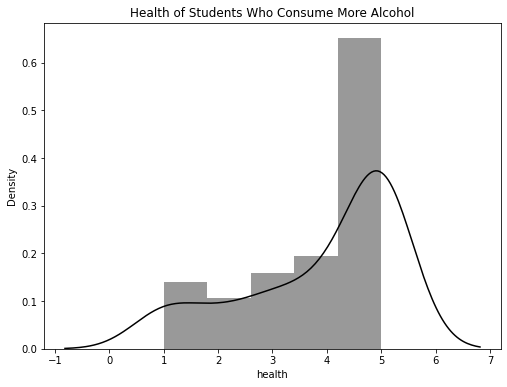

<Figure size 1080x576 with 0 Axes>

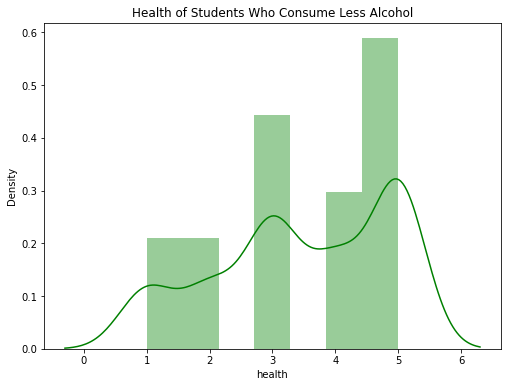

<Figure size 1080x576 with 0 Axes>

In [13]:
ax = plt.figure(figsize=(18,6)).add_subplot(121)
plt.figure(figsize = (15,8))
sns.distplot(data[(data.TotalAlc >= 3)]["health"], color = 'black', ax = ax)
ax.set_title('Health of Students Who Consume More Alcohol')
ax = plt.figure(figsize=(18,6)).add_subplot(122)
plt.figure(figsize = (15,8))
sns.distplot(data[(data.TotalAlc < 3)]['health'], color = 'green', ax = ax)
ax.set_title('Health of Students Who Consume Less Alcohol')

The health scale is from 1 to 5, with 1 being very bad health and 5 being very good health. Interestly, there are higher densities in the lower health ranges for students who consumes less alcohol than students who consume more. This is surprising because alcohol is not good for your health, so seeing that students who consume less alcohol actually report feeling worse is odd. This could be because alcohol has the affect of making people feel good for a short period of time, and young adults/teenagers are more resislient, so the after affects of alcohol may not be as harsh as it is to older adults. If this data was conducted on older adults, we may see the trend that those who consume more alcohol feel worse. Another thing is that health is very subjective; when conducting this data, people could be feeling sick and reported feeling worse than they normally do. Overall, there are many possible reasons for this very interesting result.

### Prepping Data For Machine Learning

In [14]:
# d will be mapped to columns to turn the strings into boolean True False
d = {'no':False, 'yes':True}
columns_to_bool = {'schoolsup', 'famsup', 'activities', 'higher', 'romantic'}
for col in columns_to_bool:
    data[col] = data[col].map(d)
    
d = {'F':False, 'M':True}
data['sex'] = data['sex'].map(d)

The above code is necessary to prep for the Machine Learning because columns 'schoolsup', 'famsup', 'activities', 'higher', and 'romantic' have values "yes" and "no". The sex column has "M" for males and "F" for females. Since these columns have two unique values, we can easily convert it to become a boolean (True False). We want boolean values because the machine learning will not know how to process object values (strings). 

In [15]:
#Creating dataframe to be used in ML
data2 = pd.DataFrame(data=data)
data2.drop(['school', 'famsize', 'parents cohabitation', 'Mjob', 'Fjob', 'average'], axis=1, inplace=True)
data2

,sex,age,Medu,Fedu,studytime,failures,schoolsup,famsup,activities,higher,romantic,family relationship,freetime,goout,workday alcohol,weekend alcohol,health,absences,final grade,TotalAlc
0,False,18,4,4,2,0,True,False,False,True,False,4,3,4,1,1,3,6,6,1.0
1,False,17,1,1,2,0,False,True,False,True,False,5,3,3,1,1,3,4,6,1.0
2,False,15,1,1,2,3,True,False,False,True,False,4,3,2,2,3,3,10,10,2.0
3,False,15,4,2,3,0,False,True,True,True,True,3,2,2,1,1,5,2,15,1.0
4,False,16,3,3,2,0,False,True,False,True,False,4,3,2,1,2,5,4,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,True,20,2,2,2,2,False,True,False,True,False,5,5,4,4,5,4,11,9,4.0
391,True,17,3,1,1,0,False,False,False,True,False,2,4,5,3,4,2,3,16,3.0
392,True,21,1,1,1,3,False,False,False,True,False,5,5,3,3,3,3,3,7,3.0
393,True,18,3,2,1,0,False,False,False,True,False,4,4,1,3,4,5,0,10,3.0


The above dataset will be used for Machine learning (data2). We chose to drop columns 'school', 'famsize', 'parents cohabitation', 'Mjob', 'Fjob', and 'average' because these columns have qualititative data. Machine learning requires quantative data in order to do predicitions, and this data would be hard convert to quantitative data for the machine learning to use. We also have a lot of other quantitative data already, so we feel that dropping these columns may not affect the outcomes too much. 

### Hypothesis testing

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as ms
import sklearn.metrics as met
import math 
import warnings
warnings.filterwarnings('ignore')

# model definitions for each ML we will use: Linear SVM and RandomForest
model1= {'type': SVC(), 'parameters': [{'C': [1, 10, 100, 1000],'kernel': ['linear']}] }
model2={'type': RandomForestClassifier(), 'parameters': [{'max_features' : ['auto', 'sqrt', 'log2'], 'max_depth': [None, 5, 2, 1]}]}

# defining dependent and independent variables. Our target it average weekly alcohol consumption level (TotalAlc column)
dep = data2[['TotalAlc']]
data2.drop( 'TotalAlc', axis=1, inplace=True)
ind = data2

# 80/20 split
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(ind, dep, test_size=0.2)
print(ind_train.size, ind_test.size)

6004 1501


I chose to do an 80/20 split because I want to give each ML a lot of data to train with in order to get the most accurate result. I did end up testing with different splits (60/40, 70/30), but 80/20 proved to be the best.

I chose to use the Linear SVM and Random Forest classifier algorithms. These are hyper-parameter algorithms, so to define them for model selection, I used GridSearchCV from the sklern.model_selection. This model selection also helps me do 10-fold cross validation because it creates the folds of data and tests it out on each hyper-parameter. It does this to find the best split based on accuracy. 10-fold cross validation also helps prevent overfitting, which is important in making sure our predicitions from the ML are accurate and not too dependent on training data.

In [17]:
# Training and testing
Lsvm = SVC()
RF = RandomForestClassifier()

Lsvm.fit(ind_train, dep_train)
RF.fit(ind_train, dep_train)

predicted = Lsvm.predict(ind_test)
predicted2 = RF.predict(ind_test)

Lsvm.fit(ind_train, dep_train)
RF.fit(ind_train, dep_train)

actual = np.array(dep_test)
predictions = np.array(predicted)

actual2 = np.array(dep_test)
predictions2 = np.array(predicted2)

# Confusion Matrices for each ML
cm = met.confusion_matrix(actual, predictions)
cm2 = met.confusion_matrix(actual2, predictions2)

In [18]:
# Using confusion matrix to get true positives below
# Linear SVM
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Calculating values from true positives
# Precision predictive value
PPV = TP/(TP+FP) 

# False Positive rate  
FPR = FP/(FP+TN) 

# False Negative rate  
FNR = FN/(TP+FN)

# Accuracy
ACC = (TP+TN)/(TP+FP+FN+TN) 

# Using confusion matrix to get true positives below
# Random Forests
FP2 = cm2.sum(axis=0) - np.diag(cm2)  
FN2 = cm2.sum(axis=1) - np.diag(cm2)
TP2 = np.diag(cm2)
TN2 = cm2.sum() - (FP2 + FN2 + TP2)

# Calculating values from true positives
# Precision predictive value
PPV2 = TP2/(TP2+FP2)

# False Positive rate         
FPR2 = FP2/(FP2+TN2)

# False Negative rate        
FNR2 = FN2/(TP2+FN2)

# Accuracy
ACC2 = (TP2+TN2)/(TP2+FP2+FN2+TN2)


In [19]:
from sklearn.model_selection import GridSearchCV
# Calculating 10 fold cross validation for linear SVM
grid = GridSearchCV(model1['type'], model1['parameters'], refit=True, cv = 10, scoring = 'accuracy')
estimator = grid.fit(ind_train, dep_train)
fold = (estimator.cv_results_.get('std_test_score').mean())/(math.sqrt(10))

# Calculating 10 fold cross Validation for Random Forests
grid2 = GridSearchCV(model2['type'], model2['parameters'], refit=True, cv = 10, scoring = 'accuracy')
estimator2 = grid2.fit(ind_train, dep_train)
fold2 = (estimator2.cv_results_.get('std_test_score').mean())/(math.sqrt(10))

The follow are the results of each ML. The 10 fold value printed out is with standard error.

In [20]:
print("_______LINEAR SVM RESULTS_______")
print(f"Precision predicitve value: {PPV}")
print(f"False Positive Rate: {FPR}")
print(f"False Negative Rate: {FNR}")
print(f"Accuracy: {ACC}")
print(f"10-fold for Linear SVM: {fold}")

_______LINEAR SVM RESULTS_______
Precision predicitve value: [0.74545455 0.375             nan        nan        nan]
False Positive Rate: [0.36842105 0.26315789 0.         0.         0.        ]
False Negative Rate: [0.         0.59090909 1.         1.         1.        ]
Accuracy: [0.82278481 0.64556962 0.88607595 0.93670886 0.97468354]
10-fold for Linear SVM: 0.012027129862950839


In [21]:
print("_______RANDOM FOREST RESULTS_______")
print(f"Precision predicitve value: {PPV2}")
print(f"False Positive Rate: {FPR2}")
print(f"False Negative Rate: {FNR2}")
print(f"Accuracy: {ACC2}")
print(f"10-fold for Random Forest: {fold2}")

_______RANDOM FOREST RESULTS_______
Precision predicitve value: [1.   0.88 0.5  1.    nan]
False Positive Rate: [0.         0.05263158 0.08571429 0.         0.        ]
False Negative Rate: [0.         0.         0.33333333 0.8        1.        ]
Accuracy: [1.         0.96202532 0.88607595 0.94936709 0.97468354]
10-fold for Random Forest: 0.014139933242123981


From above, we can see from the accuracy and precision matrices that Random Forest performed better than Linear SVM. Accuracy for Random Forests is 100% for average weekly alcohol consumption level of 1. This could possibly be because there is more data where workday and weekday alcohol consumption levels are 1 (see "Workday Alcohol Consumption" and "Weekday Alcohol Consumption" graphs in Exploratory Data Analysis). This means our ML will learn more about data where consumption is a level 1 than other levels. This may be what limits some of the accuracy for other classifications. To better the accuracy, the dataset should have equal amounts of data for each level of consumption, that way the ML learns more about each classification equally (as much as the train data has) than one classification over another. However, as we see from the Random Forest and even most of Linear SVM, accuracy is not a major issue. Random Forest performs quite well for the given skew in data.

## Conclusion/Evaluation

Now that we have done our exploratory analysis and hypothesis testing, we can talk more accurately about how alcohol consumption affects student success. We initially believed that high alcohol intake affects students' success at school negatively. After completing our data science cycle, we observe that our hypothesis was correct. Because high amounts of alcohol, especially at younger ages, absences at school, less study time, and weak concentration, students may show poor academic performance. This is not surprising, but it is good information to know and adds to the harmful affects of alcohol. 

We hope that this information can help show that alcohol does affect student's, expecially in higher consumption amounts. While this data was taken in Portugal where the drinking age is 18, we can still apply it to the U.S.. The drinking age is controversial in the U.S. because many countries around the world have the drinking age lower (some as low as 16). This data shows that with the lower drinking age, we risk academic performance of our teenage students, therefore it's a positive that the U.S. has the drinking age as 21 to help prevent teenage drinking (or at least make it more difficult to get access to alcohol). 